In [ ]:
!pip install -U plotly
!pip install -U scikit-learn

# Project Week 7 

Group Number: 06

Group Name: R.A.H

Group Members:

- Hussein Ali

- Reem AlQhatani

- Afrah AlHarbi

- Hessah AlMatrudi

- Ahmad AlGhazal

# LendingClub P2P Loan Analysis & Defalut Prediction

## Introduction

> `LendingClub` is a peer-to-peer lending company that specializes in providing loans to urban customers.

## Problom Statment

> The platform needs a solution that assesses and evaluates the loan's applicants whether they are likely to repay the loans fully or default.

## Dataset 

> From Kaggle Website [link](https://www.kaggle.com/jeandedieunyandwi/lending-club-dataset)

## Data Description 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>


# Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [ ]:
path = "lending_club_loan_two.csv"
df = pd.read_csv(path)
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
fig = px.pie(data_frame=df,
             names="loan_status",
             title="Loan Status")
fig.show()

In [ ]:
# ['stack', 'group', 'overlay', 'relative']
fig = px.histogram(data_frame=df,
                   x="loan_amnt",
                   color="loan_status",
                   nbins=30,
                   marginal="box",
                   barmode="group",
                   histnorm="percent",
                   title="Loan Amount($) Distribution",
                   labels={"loan_amnt": "Loan Amount",
                          "loan_status": " "}
                   )
fig.show()

In [ ]:
fig = px.histogram(data_frame=df.query("annual_inc < 200_000"),
                   x="annual_inc",
                   color="loan_status",
                   nbins=50,
                   marginal="box",
                   barmode="group",
                   histnorm="percent",
                   title="Annual Income($) Distribution",
                   labels={"annual_inc": "Annual Income($)",
                          "loan_status": " "}
                   )
fig.show()

In [ ]:
fig = px.sunburst(data_frame=df,
                  path=["loan_status" ,"grade", "sub_grade"],
                  color="int_rate",
                  color_continuous_scale="RdBu_r",
                  title="LC Loan Grade",
                  labels={"int_rate": "Interest Rate %"}
                   )
fig.update_traces(textinfo="label+percent entry")
fig.show()

In [ ]:
fig = px.histogram(data_frame=df.sort_values(by="sub_grade"),
                   x="sub_grade",
                   color="loan_status",
                   marginal="box",
                   histnorm="percent",
                   barmode="group",
                   title="LC Loan Grade & Sub-Grade Distribuation",
                   labels={"int_rate": "Interest Rate %",
                           "sub_grade": "LC Sub-Grade"}
                   )
fig.show()

In [ ]:
# dti = monthly debt / monthly income
fig = px.histogram(data_frame=df.query("dti < 50"),
                   x="dti",
                   color="loan_status",
                   #nbins=50,
                   marginal="box",
                   barmode="group",
                   histnorm="percent",
                   title="DTI Ratio Distribuation",
                   labels={"dti": "DTI Ratio",
                           "loan_status": " "}
                   )
fig.show()

In [ ]:
fig = px.histogram(data_frame=df.query("revol_util < 100"),
                   x="revol_util",
                   color="loan_status",
                   #nbins=50,
                   marginal="box",
                   barmode="group",
                   histnorm="percent",
                   title="Revolving Debt Utilization Distribuation",
                   labels={"revol_util": "Revolving Debt Utilization",
                           "loan_status": " "}
                   )
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

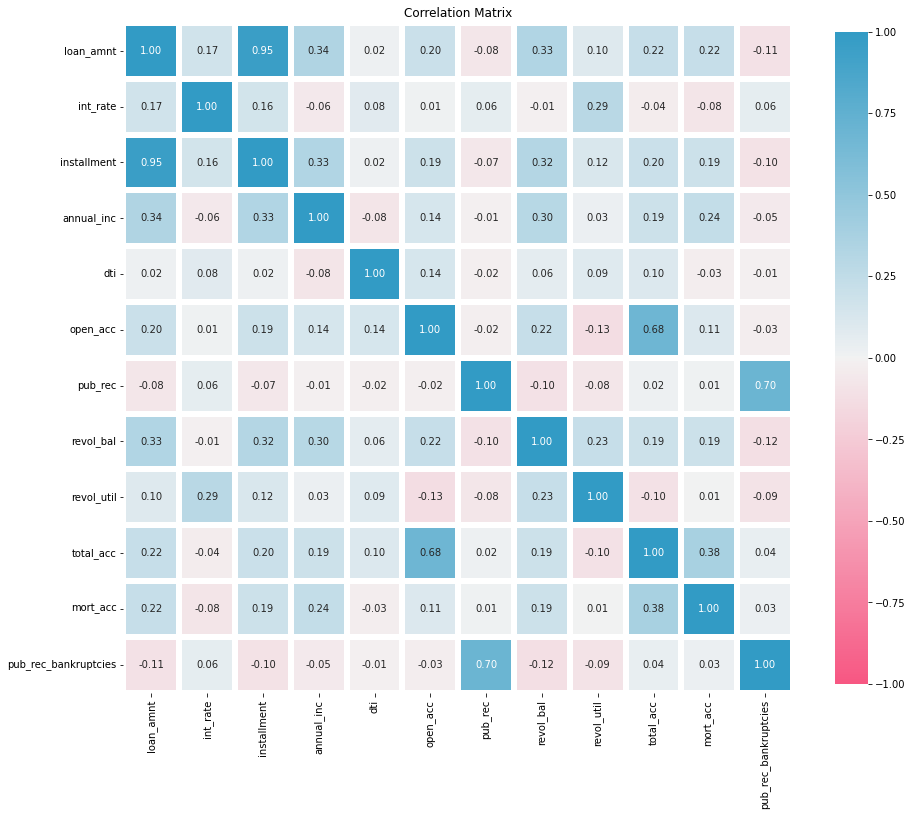

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(data=df.corr(),
            annot=True,
            fmt=".2f", 
            linewidths=5,
            cmap=cmap,
            vmin=-1,
            vmax=1, 
           cbar_kws={"shrink": .8},
           square=True)
ax.set_title("Correlation Matrix")

# Data Cleaning and Feature Extraction

In [ ]:
df.isna().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
# Feature to drop
df = df.drop(columns=["grade", "issue_d", "title",])

In [ ]:
labels = ["Fully Paid", "Charged Off"]
# Encode the label
# 0 - Fully Paid
# 1 - Charged Off
df["loan_status"] = df["loan_status"].replace({"Charged Off": 1, "Fully Paid": 0})

In [ ]:
# Extract Address Zip Code & State from address
df["zip_code"] = df["address"].str.split(" ").apply(lambda x: x[-1])
df["state"] = df["address"].str.split(" ").apply(lambda x: x[-2])
df = df.drop(columns=["address"])

In [ ]:
# Get the year in earliest_cr_line
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"]).dt.year

In [ ]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status               int64
purpose                  object
dti                     float64
earliest_cr_line          int64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
zip_code                 object
state                    object
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Encode Categorical Columns
cat_cols = df.select_dtypes(include=object).columns 
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])
df.dtypes

loan_amnt               float64
term                    float64
int_rate                float64
installment             float64
sub_grade               float64
emp_title               float64
emp_length              float64
home_ownership          float64
annual_inc              float64
verification_status     float64
loan_status               int64
purpose                 float64
dti                     float64
earliest_cr_line          int64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status     float64
application_type        float64
mort_acc                float64
pub_rec_bankruptcies    float64
zip_code                float64
state                   float64
dtype: object

In [ ]:
corr_with_loan_status = df.drop(columns=["loan_status"]).corrwith(df["loan_status"]).sort_values()

In [ ]:
fig = px.bar(x=corr_with_loan_status,
             y=corr_with_loan_status.index, 
             color=corr_with_loan_status,
             color_continuous_scale="RdBu",
             title="Correlation With Loan Status",
             labels={"x": "Correlation",
                     "y": "Feature",
                     "color": ""},
             color_continuous_midpoint=0,
             
             )
fig.show()

# Building The Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_copy = df.copy()
#df_copy = df.copy().drop(columns=["emp_title", "emp_length", "zip_code"])
#df_copy["mort_acc"] = df["mort_acc"].apply(lambda x: 1 if x > 0 else 0)
#df_copy["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
train, test = train_test_split(df_copy, test_size=0.3)

In [ ]:
def remove_outliers(data, columns, factor=1.5):
    df = data.copy()
    for col in columns:
        q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q75 - q25
        cut_off = iqr * factor
        lower, upper = q25 - cut_off, q75 + cut_off
    df = df.query(f"{col} <= @upper")
    return df

In [ ]:
train = remove_outliers(train, ["annual_inc", "dti", "revol_bal", "revol_util"])

In [ ]:
X_train = train.drop(columns=["loan_status"])
y_train = train["loan_status"]
X_test = test.drop(columns=["loan_status"])
y_test = test["loan_status"]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
def run_xgb():

    #ratio = (y_train == 1).mean() * 100
    #sample_weight = np.where(y_train == 0, 1, 1 + ratio)

    model = xgb.XGBClassifier(use_label_encoder=False,
                              #sample_weight=sample_weight,
                              max_depth=10,
                              n_estimators=500,
                              #gamma=5,
                              #objective="binary:hinge"
                              )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp_cm.plot()
    disp_roc = RocCurveDisplay.from_predictions(y_test, y_prob[:, 1])
    disp_pr = PrecisionRecallDisplay.from_predictions(y_test, y_prob[:, 1])


    return model

# Run & Evaluate Model

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     95370
           1       0.88      0.50      0.64     23439

    accuracy                           0.89    118809
   macro avg       0.88      0.74      0.79    118809
weighted avg       0.89      0.89      0.88    118809



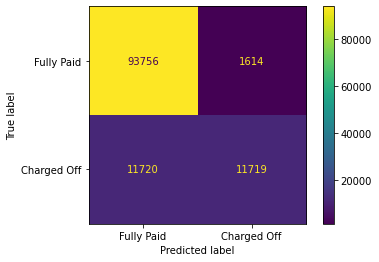

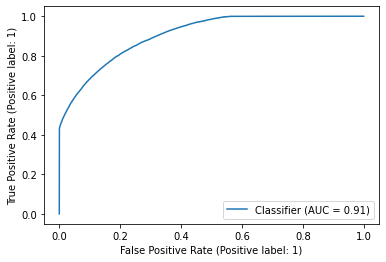

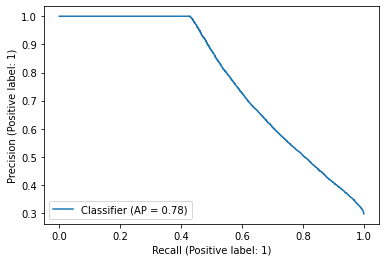

In [ ]:
xgb_model = run_xgb()

In [ ]:
feature_importances = pd.Series(data=xgb_model.feature_importances_, index=X_train.columns).sort_values()
fig = px.bar(x=feature_importances,
             y=feature_importances.index, 
             color=corr_with_loan_status,
             title="Correlation With Loan Status",
             labels={"x": "Feature Importances",
                     "y": "Feature",
                     "color": ""},
             color_continuous_midpoint=0,
             )
fig.show()

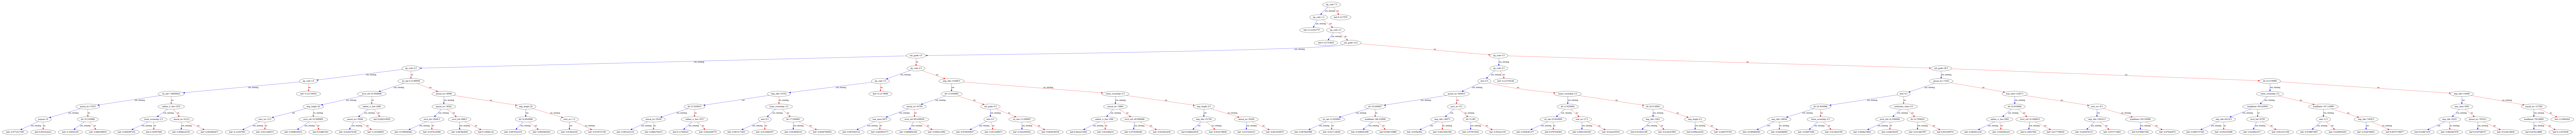

In [ ]:
fig, ax = plt.subplots(figsize=(200, 200))
xgb.plot_tree(xgb_model, num_trees=10, ax=ax)
fig.show()

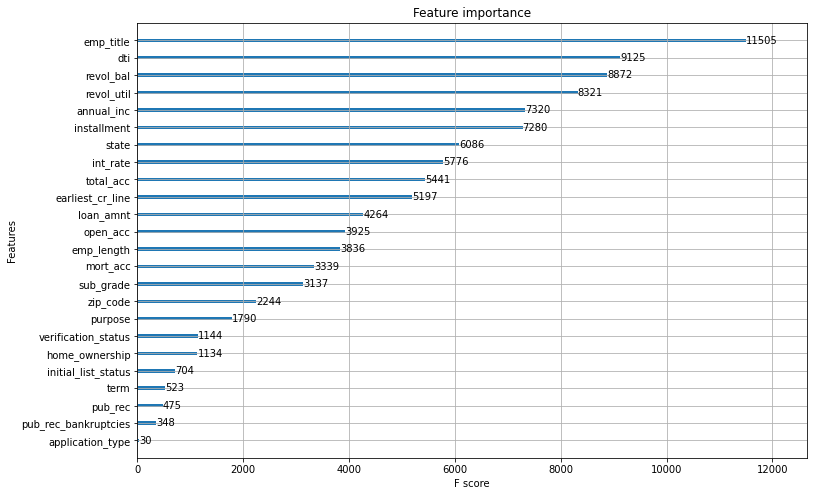

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax, importance_type="weight")
fig.show()

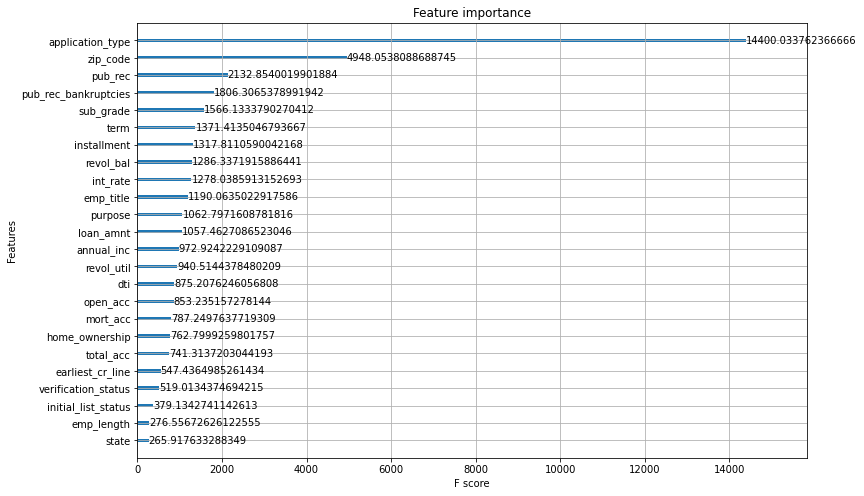

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax, importance_type="cover")
fig.show()

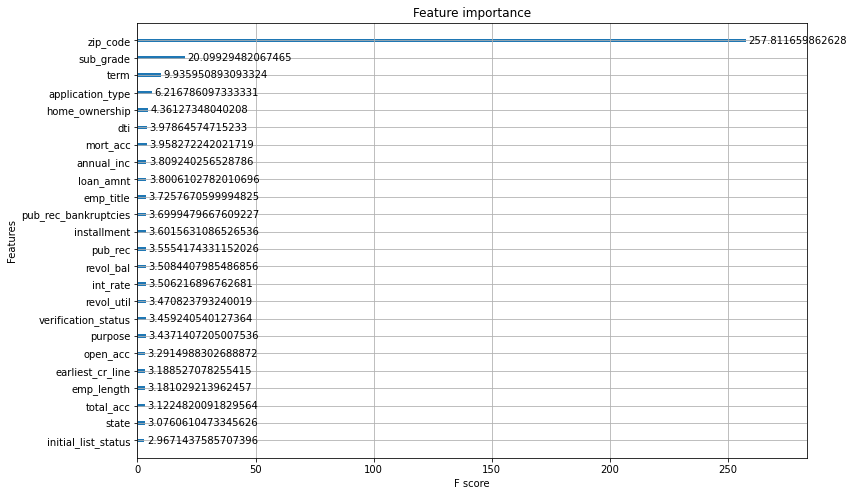

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax, importance_type="gain")
fig.show()

In [ ]:
# weight’: the number of times a feature is used to split the data across all trees.
# gain’: the average gain across all splits the feature is used in.
# cover’: the average coverage across all splits the feature is used in.
# total_gain’: the total gain across all splits the feature is used in.
# total_cover’: the total coverage across all splits the feature is used in.